In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from models import knn, lr, gnb, svc

In [2]:
# Load in data
DATA_PATH = Path("data") / "SRP120552.tsv"
df = pd.read_csv(DATA_PATH, sep="\t")
df = df.set_index("Gene")

df

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,56.629600,210.765150,0.000000,15.582642,0.000000,3.951188,1.013635,10.157310,12.500870,1.535458,...,143.910830,122.749306,0.000000,122.250435,94.166710,147.495970,0.000000,369.399140,0.000000,2.995046
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,52.532257,181.474520,250.384250,61.192110,0.854224,29.988983,32.392227,43.866116,34.768540,10.885117,...,0.000000,117.458120,0.000000,9.408690,56.129097,112.473976,7.008246,0.000000,248.942280,0.000000
ENSG00000000457,6.420248,9.038753,6.449249,0.896064,9.391796,1.694619,1.771045,0.890477,15.431188,6.612335,...,0.756136,0.789532,2.880358,3.794541,3.027338,0.790558,3.477984,2.319273,2.393112,236.096450
ENSG00000000460,0.000000,27.647682,0.000000,140.431730,0.000000,15.594472,10.486232,1.409931,43.129833,3.073701,...,0.000000,0.000000,0.000000,0.000000,3.229686,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286268,0.000000,0.000000,0.000000,0.000000,0.000000,2.140921,0.000000,0.000000,0.000000,1.921149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286269,3.012283,6.357253,0.000000,2.920779,12.417953,2.216796,3.025142,2.377553,2.266806,0.000000,...,1.006215,0.000000,0.835804,1.811789,4.883857,1.861232,6.817812,0.000000,0.000000,0.000000
ENSG00000286270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# Sort data to get top 5000 most variable genes
gene_variability = df.T.var(axis=0)
top_5000_indices = gene_variability.sort_values(ascending=False).head(5000).index
top_5000 = df.loc[top_5000_indices]

top_5000

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000210082,5599.750000,7230.140000,735357.440000,7469.360000,8766.538000,21430.752000,4058.474000,7557.278300,2793.431200,7111.938000,...,11465.611000,9888.944000,15644.154000,12655.970000,10016.802000,19831.766000,18816.709000,8673.412000,15588.810000,26950.832000
ENSG00000198804,4601.987300,7942.763700,391568.720000,9359.391000,85.343575,15969.971000,5007.246600,6474.729500,2219.409000,18382.117000,...,6155.149000,3330.031200,10697.963000,8370.051000,4245.984400,4976.292500,9354.555000,2280.387200,2159.225600,12917.124000
ENSG00000198712,4125.296400,10058.292000,352864.000000,5511.187500,7439.168000,12321.420000,2858.999000,4128.221700,3296.330000,8210.033000,...,8982.472000,7998.817400,12161.105000,5640.481000,7556.910000,13185.232000,13853.082000,5620.254000,9419.205000,19412.781000
ENSG00000198727,2734.201400,6546.200700,387255.400000,3957.722200,56.533360,7474.785600,1651.317300,2853.277800,2421.224900,7816.785000,...,3121.184800,6170.355000,4410.043500,2201.462000,4224.937000,8407.100000,6059.807600,1360.717500,6166.484400,5891.238000
ENSG00000198886,1673.385400,4487.421000,225261.050000,3340.211200,20.481420,4489.030000,1985.255100,2374.972200,1719.037500,3426.516600,...,2441.369900,5099.869600,3248.778000,3038.138000,3477.907500,6141.428700,5923.356400,2601.986300,5105.626500,4846.794400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000084733,15.421330,262.426970,0.000000,27.020786,0.000000,129.898960,42.562950,17.570818,46.036050,16.854181,...,0.517226,68.886090,0.000000,0.000000,208.399930,39.218490,0.000000,0.000000,249.126790,8.948737
ENSG00000051620,11.990015,99.676315,14.618929,1.286581,0.000000,23.217503,0.000000,82.760660,0.000000,0.000000,...,36.561820,71.034620,84.136740,0.000000,0.000000,2.148382,27.013287,0.000000,0.815208,0.000000
ENSG00000167693,0.686648,228.725770,7.209654,4.311105,0.000000,54.070942,11.752263,6.790919,18.381227,14.180720,...,0.000000,9.173718,261.846700,119.232860,0.000000,2.361594,0.000000,0.000000,0.000000,18.095724


In [4]:
# Get train and testing data, checking for t0 vs REST
from actual_labels import get_actual_labels

x_train, x_test, y_train, y_test = train_test_split(
    top_5000.T, # x
    get_actual_labels(), # y
    test_size = 0.2,
    random_state = 0
)

y_train = np.where(y_train > 0, 1, 0)
y_test =  np.where(y_test > 0, 1, 0)

y_train, y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [5]:
# Predict with other models
knn_pred = knn(x_train, x_test, y_train)
lr_pred = lr(x_train, x_test, y_train)
gnb_pred = gnb(x_train, x_test, y_train)
svc_pred = svc(x_train, x_test, y_train)

knn_pred, lr_pred, gnb_pred, svc_pred

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1,

In [8]:
matrix = pd.DataFrame({
    "sample": x_test.index,
    "knn": knn_pred,
    "lr": lr_pred,
    "gnb": gnb_pred,
    "svc": svc_pred,
    "actual": y_test
})
matrix = matrix.set_index("sample")

matrix

,knn,lr,gnb,svc,actual
sample,,,,,
SRR6192390,1,1,1,1,1
SRR6192244,1,1,1,1,1
SRR6191764,1,1,0,1,1
SRR6191999,1,1,0,1,1
SRR6191836,1,1,1,1,1
...,...,...,...,...,...
SRR6191914,0,0,0,1,0
SRR6192233,1,1,1,1,1
SRR6191893,0,0,1,0,0


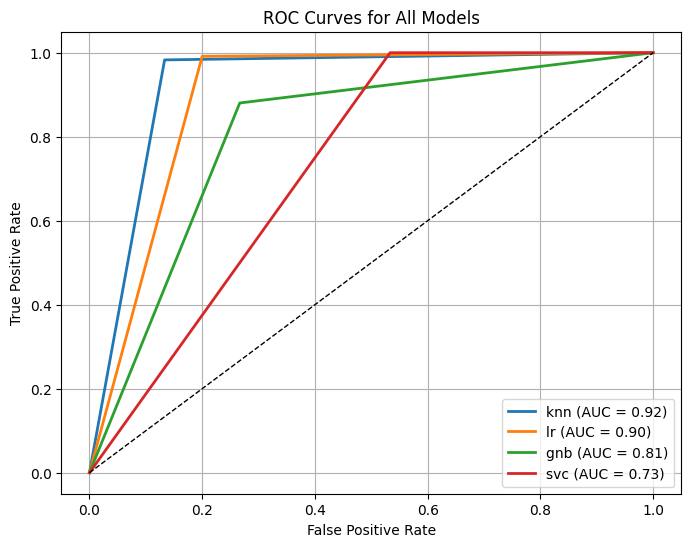

In [10]:
# Plot ROC
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, y_score in matrix.items():
    if name == "sample" or name == "actual":
        continue
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()